In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [14]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

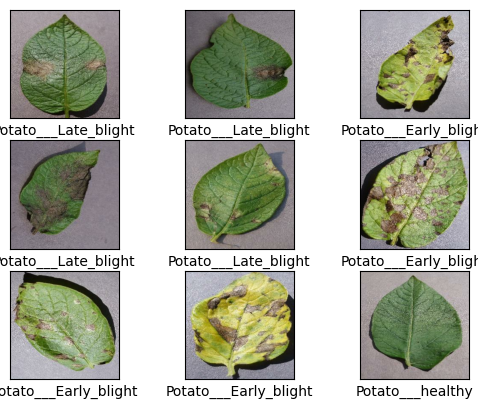

In [13]:
for image_batch, labels_batch in dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.xlabel(class_names[labels_batch[i]])
    plt.show()

80% ==> tranning
20% ==> 10% validation, 10% test (measure accuracy)

In [15]:
train_size = 0.8
len(dataset)* train_size

54.400000000000006

In [16]:
train_ds = dataset.take(54)
len(train_ds)

54

In [18]:
remainning_ds = dataset.skip(54)
len(remainning_ds)

14

In [20]:
validation_size = 0.1
len(dataset) * validation_size

6.800000000000001

In [23]:
validation_ds = remainning_ds.take(6)
len(validation_ds)

6

In [24]:
test_ds = remainning_ds.skip(6)
len(test_ds)

8

In [29]:
def get_dataset_partitions(dataset, train_split=0.8, validation_split=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    ds_size =  len(dataset)
    if shuffle:
        ds = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * validation_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [30]:
train_ds,val_ds,test_ds = get_dataset_partitions(dataset)

In [31]:
len(dataset)
len(train_ds), len(val_ds), len(test_ds)

(54, 6, 8)

In [32]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [35]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)